In [18]:
import cv2
from gaze_tracking import GazeTracking
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

from tqdm import trange

In [19]:
def down_sample(x, f):
    xp = np.r_[x, float('nan') + np.zeros((-len(x) % f,))]
    return np.nanmean(xp.reshape(-1, f), axis=-1)

In [20]:
def plot_attention(h_gaze, v_gaze, blinks):
    # plt.ylim(1, 0)

    h_avg = down_sample(h_gaze, 20)
    v_avg = down_sample(v_gaze, 20)
    b_avg = down_sample(blinks, 20)

    hsmoothed = gaussian_filter1d(h_avg, sigma=2)
    vsmoothed = gaussian_filter1d(v_avg, sigma=2)
    bsmoothed = gaussian_filter1d(b_avg, sigma=2)

    out = hsmoothed * vsmoothed * bsmoothed
    
    norm_out = 1- (out - np.min(out)) / (np.max(out) - np.min(out))

    # plt.plot(hsmoothed)
    # plt.plot(vsmoothed)
    # plt.plot(bsmoothed)
    plt.plot(norm_out)

100%|██████████| 607/607 [02:31<00:00,  4.01it/s]


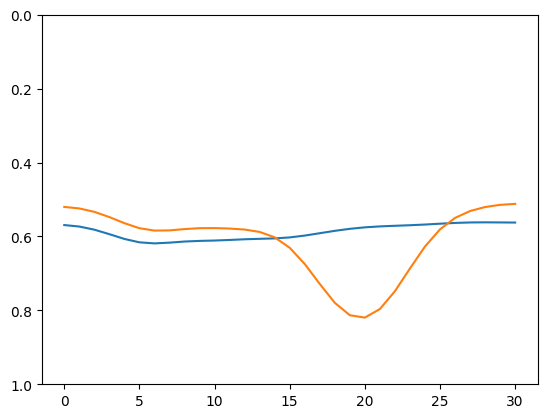

In [4]:
gaze = GazeTracking()
data = cv2.VideoCapture("sample_a.mp4")
# data = cv2.VideoCapture(0)
length = int(data.get(cv2.CAP_PROP_FRAME_COUNT))

h_gaze = []
v_gaze = []
blinks = []

for i in trange(length):
    _, frame = data.read()
    gaze.refresh(frame)

    h_gaze.append(gaze.horizontal_ratio())
    v_gaze.append(gaze.vertical_ratio())
    if(gaze.is_blinking()):
        blinks.append(1)
    else:
        blinks.append(0)

plot_attention(h_gaze, v_gaze, blinks)

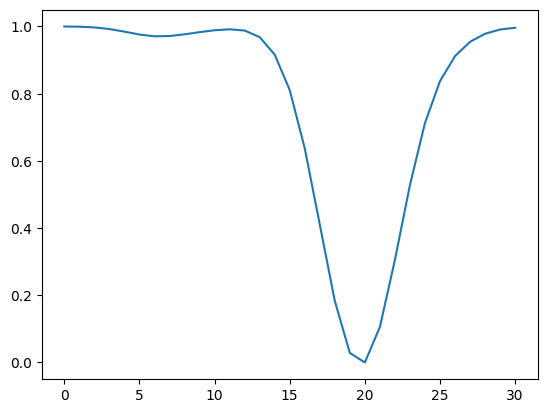

In [21]:
plot_attention(h_gaze, v_gaze, blinks)